# Can We Detect Aurora on an Exoplanet (in IR/Radio)?
## Candidate: DS TucA and DS TucAb (warm Neptune)
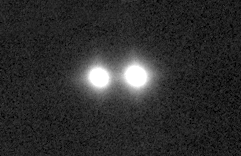

## 1. Stellar Wind (awsom)
### 1.0 Member: Meng

### 1.1 Input: Parameter
(description and picture)

### 1.2 Output: SEP spectrum
(description and picture)

## 2. GM (BATSRUS)
### 2.0 Member: Vishal

### 2.1 Input: Parameter (solar wind velocity, density)
(description and picture)

### 2.2 Output: patterns of particle precipitation, ionospheric electrodynamics 
(description and picture)

## 3. Atmosphere (PWOM)
### 3.0 Member: Mei-Yun Lin

### 3.1 Input: SEP spectrum, solar activity index (F10.7)
(description and picture)

### 3.2 Output: Ion density, such as H3+
(description and picture)

## 4. Aurora (h3ppy)
### 4.0 Member: Caitlyn

### 4.1 Input: atmospheric profile, such as ion density
(description and picture)

### 4.2 Output: Aurora observed by JWST
(description and picture)